# **Загрузка исходных данных**

In [ ]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузка таблиц
df_params = pd.read_excel('/content/dataset1.xlsx')                     # параметры добывающих скважин
df_output = pd.read_excel('/content/dataset2.xlsx')           # выход индикатора
df_volume = pd.read_excel('/content/dataset3_g.xlsx')            # объемные характеристики # в characteristics неверный датасет!
df_speed = pd.read_excel('/content/dataset4.xlsx')        # скорости фильтрации
df_perm = pd.read_excel('/content/dataset5.xlsx')                 # проницаемость
df_area = pd.read_excel('/content/dataset6.xlsx')         # сечения
df_impact = pd.read_excel('/content/dataset7.xlsx')        # влияние нагнетательной скважины

In [ ]:
# Шаг 1: merge параметров и выхода индикатора
df_merged = df_params.merge(df_output, on=['Number_expl_well', 'Id _pump_well'], how='left') \
                .merge(df_volume, on=['Number_expl_well', 'Id _pump_well'], how='left') \
                .merge(df_speed, on=['Number_expl_well', 'Id _pump_well'], how='left') \
                .merge(df_perm, on=['Number_expl_well', 'Id _pump_well'], how='left') \
                .merge(df_area, on=['Number_expl_well', 'Id _pump_well'], how='left') \
                .merge(df_impact, on=['Number_expl_well', 'Id _pump_well'], how='left')
df_merged.head()

,Number_expl_well,"Дебит жидкости, м3/сут","Дебит нефти, м3/сут","Обводненность, %",Id _pump_well,effect_time,hours,"Масса вынесенного трассера, кг",Выход индикатора в % относительно массы закачки,Выход индикатора в % относительно отобранной массы,...,"Средняя приведенная проницаемость, кв. мкм (Д)","Гидропроводность установленных каналов фильтрации, Д*см/сП",effect_perm,"Объем породы, м3","Площадь сечения условного канала (системы каналов), м2",effect_area,Обводненность на декабрь 2022 года,"Степень влияния наг. воды на обводненность, %",классификация,effect_class
0,2,74.26,16.34,78,361,NaN,118.0,20.857,4.17,4.98,...,223.59,1465,NaN,212.02,0.10,NaN,78.0,12.26,2,1.0
1,31,23.25,22.78,2,361,-1.0,0.0,0.000,0.00,0.00,...,0.00,0,-1.0,0.00,0.00,-1.0,2.0,0.00,0,NaN
2,58,55.64,18.92,66,361,NaN,68.0,3.865,0.77,0.92,...,2.25,78,NaN,98.76,0.33,NaN,66.0,4.44,1,NaN
3,187,26.11,21.15,19,361,NaN,99.0,1.014,0.20,0.24,...,61.12,306,NaN,30.39,0.02,NaN,19.0,10.06,2,NaN
4,188,338.40,47.38,86,361,NaN,21.0,54.748,10.95,13.08,...,334.33,3709,NaN,521.92,0.23,NaN,86.0,7.07,2,1.0


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 32 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Number_expl_well                                                       551 non-null    int64  
 1   Дебит жидкости, м3/сут                                                 551 non-null    float64
 2   Дебит нефти, м3/сут                                                    551 non-null    float64
 3   Обводненность, %                                                       551 non-null    int64  
 4   Id _pump_well                                                          551 non-null    int64  
 5   effect_time                                                            111 non-null    float64
 6   hours                                                                  550 non-null    flo

In [ ]:
df = df_merged.rename(columns={
    'Number_expl_well': 'well_num',
    'Дебит жидкости, м3/сут': 'debit_liq',
    'Дебит нефти, м3/сут': 'debit_oil',
    'Обводненность, %': 'watercut',
    'Id _pump_well': 'inj_well_id',
    'hours': 'hours',
    'Масса вынесенного трассера, кг': 'tracer_mass_out',
    'Выход индикатора в % относительно массы закачки': 'tracer_out_perct_pump_mass',
    'Выход индикатора в % относительно отобранной массы': 'tracer_out_perct_select_mass',
    'Производит-ть проницаемой системы, м3/сут': 'perm_sys_prod_rate',
    'Количество закачанного индикатора, кг': 'tracer_mass_in',
    'Суммарное количество трассера, вышедшего на дневную поверхность': 'tracer_total_out',
    'Суммарная производительность всей проницаемой системы скважин  м3/сут': 'total_perm_sys_prod_rate',
    'Минимальное расстояние до нагнетательной скважины, м': 'min_dist_to_inj',
    'Минимальная скорость фильтрации, м/сут': 'min_filtration_rate',
    'Максимальная скорость фильтрации, м/сут': 'max_filtration_rate',
    'Средняя скорость фильтрации, м/сут': 'avg_filtration_rate',
    'Min. фактическая проницаемость, кв. мкм (Д)': 'perm_min',
    'Max. фактическая проницаемость, кв. мкм (Д)': 'perm_max',
    'Средняя приведенная проницаемость, кв. мкм (Д)': 'perm_avg_adj',
    'Гидропроводность установленных каналов фильтрации, Д*см/сП': 'hydroconductivity',
    'Объем породы, м3': 'rock_volume',
    'Площадь сечения условного канала (системы каналов), м2': 'cross_section_area',
    'Обводненность на декабрь 2022 года': 'watercut_dec',
    'Степень влияния наг. воды на обводненность, %': 'water_inj_impact_pct',
    'классификация': 'class',
})

In [ ]:
df = df.drop('watercut_dec', axis = 1)
df.head()

,well_num,debit_liq,debit_oil,watercut,inj_well_id,effect_time,hours,tracer_mass_out,tracer_out_perct_pump_mass,tracer_out_perct_select_mass,...,perm_max,perm_avg_adj,hydroconductivity,effect_perm,rock_volume,cross_section_area,effect_area,water_inj_impact_pct,class,effect_class
0,2,74.26,16.34,78,361,NaN,118.0,20.857,4.17,4.98,...,1294.42,223.59,1465,NaN,212.02,0.10,NaN,12.26,2,1.0
1,31,23.25,22.78,2,361,-1.0,0.0,0.000,0.00,0.00,...,0.00,0.00,0,-1.0,0.00,0.00,-1.0,0.00,0,NaN
2,58,55.64,18.92,66,361,NaN,68.0,3.865,0.77,0.92,...,50.25,2.25,78,NaN,98.76,0.33,NaN,4.44,1,NaN
3,187,26.11,21.15,19,361,NaN,99.0,1.014,0.20,0.24,...,1084.12,61.12,306,NaN,30.39,0.02,NaN,10.06,2,NaN
4,188,338.40,47.38,86,361,NaN,21.0,54.748,10.95,13.08,...,10020.58,334.33,3709,NaN,521.92,0.23,NaN,7.07,2,1.0


#**EDA (exploratory data analysis)**

In [ ]:
# общая характеристика|
df.describe().T

,count,mean,std,min,25%,50%,75%,max
well_num,551.0,1109.584392,1215.683541,2.00000,306.500000,569.000000,1389.000000,5030.000000
debit_liq,551.0,240.111579,250.784746,10.00000,55.640000,130.000000,368.410000,1074.730000
debit_oil,551.0,51.012505,45.290380,3.70000,24.765000,43.810000,63.820000,715.000000
watercut,551.0,57.021779,30.558610,1.00000,30.000000,56.000000,86.000000,97.000000
inj_well_id,551.0,639.680581,594.447370,185.00000,333.000000,362.000000,630.000000,3054.000000
effect_time,111.0,-1.000000,0.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000
hours,550.0,383.461818,857.801078,0.00000,16.000000,54.500000,409.000000,6622.000000
tracer_mass_out,551.0,5.517260,16.522883,0.00000,0.006577,0.228000,2.208250,197.390000
tracer_out_perct_pump_mass,551.0,1.576708,3.857712,0.00000,0.000152,0.190000,1.090000,39.820000
tracer_out_perct_select_mass,551.0,3.578160,8.161797,0.00000,0.015297,0.540000,3.385000,77.085378


In [ ]:
df[df['hours'].isnull()]

,well_num,debit_liq,debit_oil,watercut,inj_well_id,effect_time,hours,tracer_mass_out,tracer_out_perct_pump_mass,tracer_out_perct_select_mass,...,perm_max,perm_avg_adj,hydroconductivity,effect_perm,rock_volume,cross_section_area,effect_area,water_inj_impact_pct,class,effect_class
188,1251,389.32,54.5,86,362,NaN,NaN,0.2702,0.05,0.11,...,1290.89,185.08,1627,NaN,214.79,0.08,NaN,0.92,0,NaN


In [ ]:
df = df.drop(labels = [188], axis = 0)

In [ ]:
cols = ['effect_class', 'effect_area', 'effect_perm', 'effect_speed', 'effect_vol', 'effect_time']
df['effect'] = df[cols].bfill(axis=1).iloc[:, 0]

In [ ]:
df = df.drop(cols, axis = 1)
df.head()

,well_num,debit_liq,debit_oil,watercut,inj_well_id,hours,tracer_mass_out,tracer_out_perct_pump_mass,tracer_out_perct_select_mass,perm_sys_prod_rate,...,avg_filtration_rate,perm_min,perm_max,perm_avg_adj,hydroconductivity,rock_volume,cross_section_area,water_inj_impact_pct,class,effect
0,2,74.26,16.34,78,361,118.0,20.857,4.17,4.98,7.631,...,72.79,30.21,1294.42,223.59,1465,212.02,0.10,12.26,2,1.0
1,31,23.25,22.78,2,361,0.0,0.000,0.00,0.00,0.000,...,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0,-1.0
2,58,55.64,18.92,66,361,68.0,3.865,0.77,0.92,1.489,...,4.57,0.84,50.25,2.25,78,98.76,0.33,4.44,1,NaN
3,187,26.11,21.15,19,361,99.0,1.014,0.20,0.24,0.408,...,24.60,21.69,1084.12,61.12,306,30.39,0.02,10.06,2,NaN
4,188,338.40,47.38,86,361,21.0,54.748,10.95,13.08,20.051,...,88.23,39.27,10020.58,334.33,3709,521.92,0.23,7.07,2,1.0


<Axes: xlabel='effect', ylabel='count'>

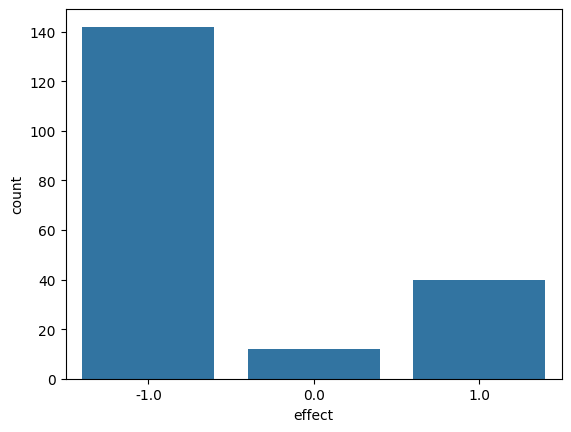

In [ ]:
sns.countplot(df, x = 'effect')

In [ ]:
# классы несбалансированны, присутствуют много пустых значений - > поможем алгоритму, проведя доп. анализ
df['effect'].value_counts()

,count
effect,
-1.0,142
1.0,40
0.0,12


#**Feature engeenering**

In [ ]:
#Добавление новых категориальных признаков

# 1. Категория по времени прорыва
def categorize_hours(hours):
    if 0 < hours <= 120:  # до 5 суток
        return 1  # короткое время
    elif 120 < hours <= 600:  # от 5 до 25 суток
        return 0  # среднее время
    else:
        return -1  # долгое время

df['breakthrough_time_cat'] = df['hours'].apply(categorize_hours)
# 1 - хорошо

# 2. Категория по массе вынесенного трассера (исключаем нули из расчёта среднего)
mean_tracer_mass = df.loc[df['tracer_mass_out'] > 0, 'tracer_mass_out'].mean()
df['tracer_output_cat'] = (df['tracer_mass_out'] > mean_tracer_mass).astype(int)

mean_tracer_mass_perct = df.loc[df['tracer_out_perct_select_mass'] > 0, 'tracer_out_perct_select_mass'].mean()
df['tracer_perct_cat'] = (df['tracer_out_perct_select_mass'] > mean_tracer_mass_perct).astype(int)

In [ ]:
def map_impact(rate):
    if rate >= 2:
        return 1
    else:
        return 0
df['cat_impact'] = df['class'].apply(map_impact)
# 1 - max влияние
# 0 - min влияние

In [ ]:
def rock_volume_cat(vol):
    if vol < 60:
        return 0 # это малый объем - плохо
    else:
        return 1 # это хороший объем
df['cat_volume'] = df['rock_volume'].apply(rock_volume_cat)

In [ ]:
# Категория по категории обводненности
df['cat_watercut'] = (df['watercut'] > 50).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 550
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   well_num                      550 non-null    int64  
 1   debit_liq                     550 non-null    float64
 2   debit_oil                     550 non-null    float64
 3   watercut                      550 non-null    int64  
 4   inj_well_id                   550 non-null    int64  
 5   hours                         550 non-null    float64
 6   tracer_mass_out               550 non-null    float64
 7   tracer_out_perct_pump_mass    550 non-null    float64
 8   tracer_out_perct_select_mass  550 non-null    float64
 9   perm_sys_prod_rate            550 non-null    float64
 10  tracer_mass_in                550 non-null    int64  
 11  tracer_total_out              550 non-null    float64
 12  total_perm_sys_prod_rate      550 non-null    float64
 13  min_dist_t

In [ ]:
df['effect_score'] = df[['breakthrough_time_cat', 'tracer_output_cat', 'cat_impact','cat_volume', 'cat_watercut', 'tracer_perct_cat']].sum(axis=1)
def map_effect(score):
    if score >= 4:
        return 1
    elif 1< score < 4:
        return 0
    else:
        return -1
df['effect_calc'] = df['effect_score'].apply(map_effect)

In [ ]:
df[(df['effect_calc'] == 1) & (df['effect'] == -1)]

,well_num,debit_liq,debit_oil,watercut,inj_well_id,hours,tracer_mass_out,tracer_out_perct_pump_mass,tracer_out_perct_select_mass,perm_sys_prod_rate,...,class,effect,breakthrough_time_cat,tracer_output_cat,tracer_perct_cat,cat_impact,cat_volume,cat_watercut,effect_score,effect_calc


In [ ]:
# Таким образом, удалось получить дополнительные скважины, которые могут быть кандидатами, причем такие, что они не противоречат экспертной оценке (нет таких скважин, что effect = -1, а effect_calc = 1)

In [ ]:
df_main = df.copy()

In [ ]:
df.loc[df['effect_calc'] == 1, 'effect'] = df['effect_calc']

<Axes: xlabel='effect', ylabel='count'>

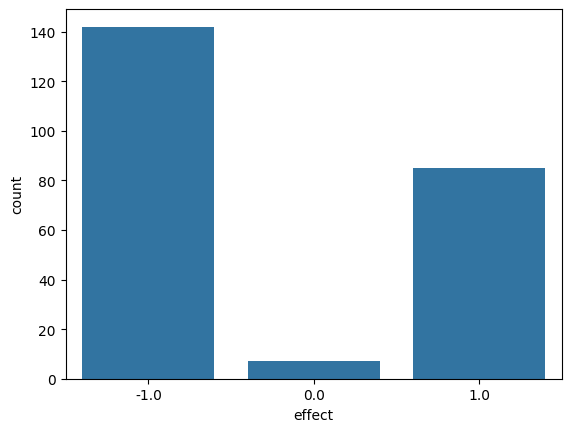

In [ ]:
sns.countplot(df, x = 'effect')

In [ ]:
df['effect'].value_counts()

,count
effect,
-1.0,142
1.0,85
0.0,7


In [ ]:
df.isnull().sum()

,0
well_num,0
debit_liq,0
debit_oil,0
watercut,0
inj_well_id,0
hours,0
tracer_mass_out,0
tracer_out_perct_pump_mass,0
tracer_out_perct_select_mass,0
perm_sys_prod_rate,0


Далее задача разделяется на 2 направления:

1.   Создать рекомендательную систему
2.   Построить модель для нахождения скважин-кандидатов

Для решения первой задачи необходимо заполнить пропуски. Это можно сделать также на основе балльной системы.

Вторая задача имеет множество решений. И в ее решении как раз поможет рекомендательная система от первой задача. Суть такова: можно построить не многоклассовую модель, а бинарную классификацию с нахождением потенциальных скважин среди нулей. Либо можно найти по балльной системы все возможные скважины, а оставшиеся спрогнозировать на 1, 0, -1. И также добавить фактор уверенности на основе рекомендаций из первой задачи.

**1 задача - "Построение рекомендательной системы"**

1. заполняем пропуски на основе балльной логики

In [ ]:
df[(df['effect_calc'] == -1) & (df['effect'] == 0)]

,well_num,debit_liq,debit_oil,watercut,inj_well_id,hours,tracer_mass_out,tracer_out_perct_pump_mass,tracer_out_perct_select_mass,perm_sys_prod_rate,...,class,effect,breakthrough_time_cat,tracer_output_cat,tracer_perct_cat,cat_impact,cat_volume,cat_watercut,effect_score,effect_calc


Отлично, effect_calc = -1 не противоречит экспертной оценке, значит можем смело заполнить effect

In [ ]:
df.loc[(df['effect_calc'] == -1) & (df['effect'].isna()), 'effect'] = df['effect_calc']

In [ ]:
df.isnull().sum()

,0
well_num,0
debit_liq,0
debit_oil,0
watercut,0
inj_well_id,0
hours,0
tracer_mass_out,0
tracer_out_perct_pump_mass,0
tracer_out_perct_select_mass,0
perm_sys_prod_rate,0


Удалось сократить пустые значения более чем в два раза!

<Axes: xlabel='effect', ylabel='count'>

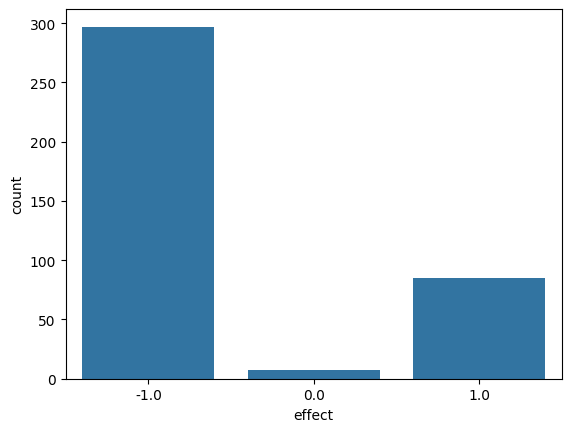

In [ ]:
sns.countplot(data = df, x = 'effect')

In [ ]:
df['effect'].value_counts()

,count
effect,
-1.0,297
1.0,85
0.0,7


In [ ]:
nan_mask = df['effect'].isna()

Остальные значения отметим как неопределенные - 0. Эксперты и балльная логика не смогла определить точно, что это за классы.

In [ ]:
df.loc[df['effect'].isna() & (df['effect_calc'] == 0), 'effect'] = 0

In [ ]:
df['effect'].value_counts()

,count
effect,
-1.0,297
0.0,168
1.0,85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 550
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   well_num                      550 non-null    int64  
 1   debit_liq                     550 non-null    float64
 2   debit_oil                     550 non-null    float64
 3   watercut                      550 non-null    int64  
 4   inj_well_id                   550 non-null    int64  
 5   hours                         550 non-null    float64
 6   tracer_mass_out               550 non-null    float64
 7   tracer_out_perct_pump_mass    550 non-null    float64
 8   tracer_out_perct_select_mass  550 non-null    float64
 9   perm_sys_prod_rate            550 non-null    float64
 10  tracer_mass_in                550 non-null    int64  
 11  tracer_total_out              550 non-null    float64
 12  total_perm_sys_prod_rate      550 non-null    float64
 13  min_dist_t

Нулевых значений нет - отлично. Произведем окончательную проверку на мультиколлинеарность и займемся обучением модели.

Text(0.5, 1.0, 'Корреляция признаков')

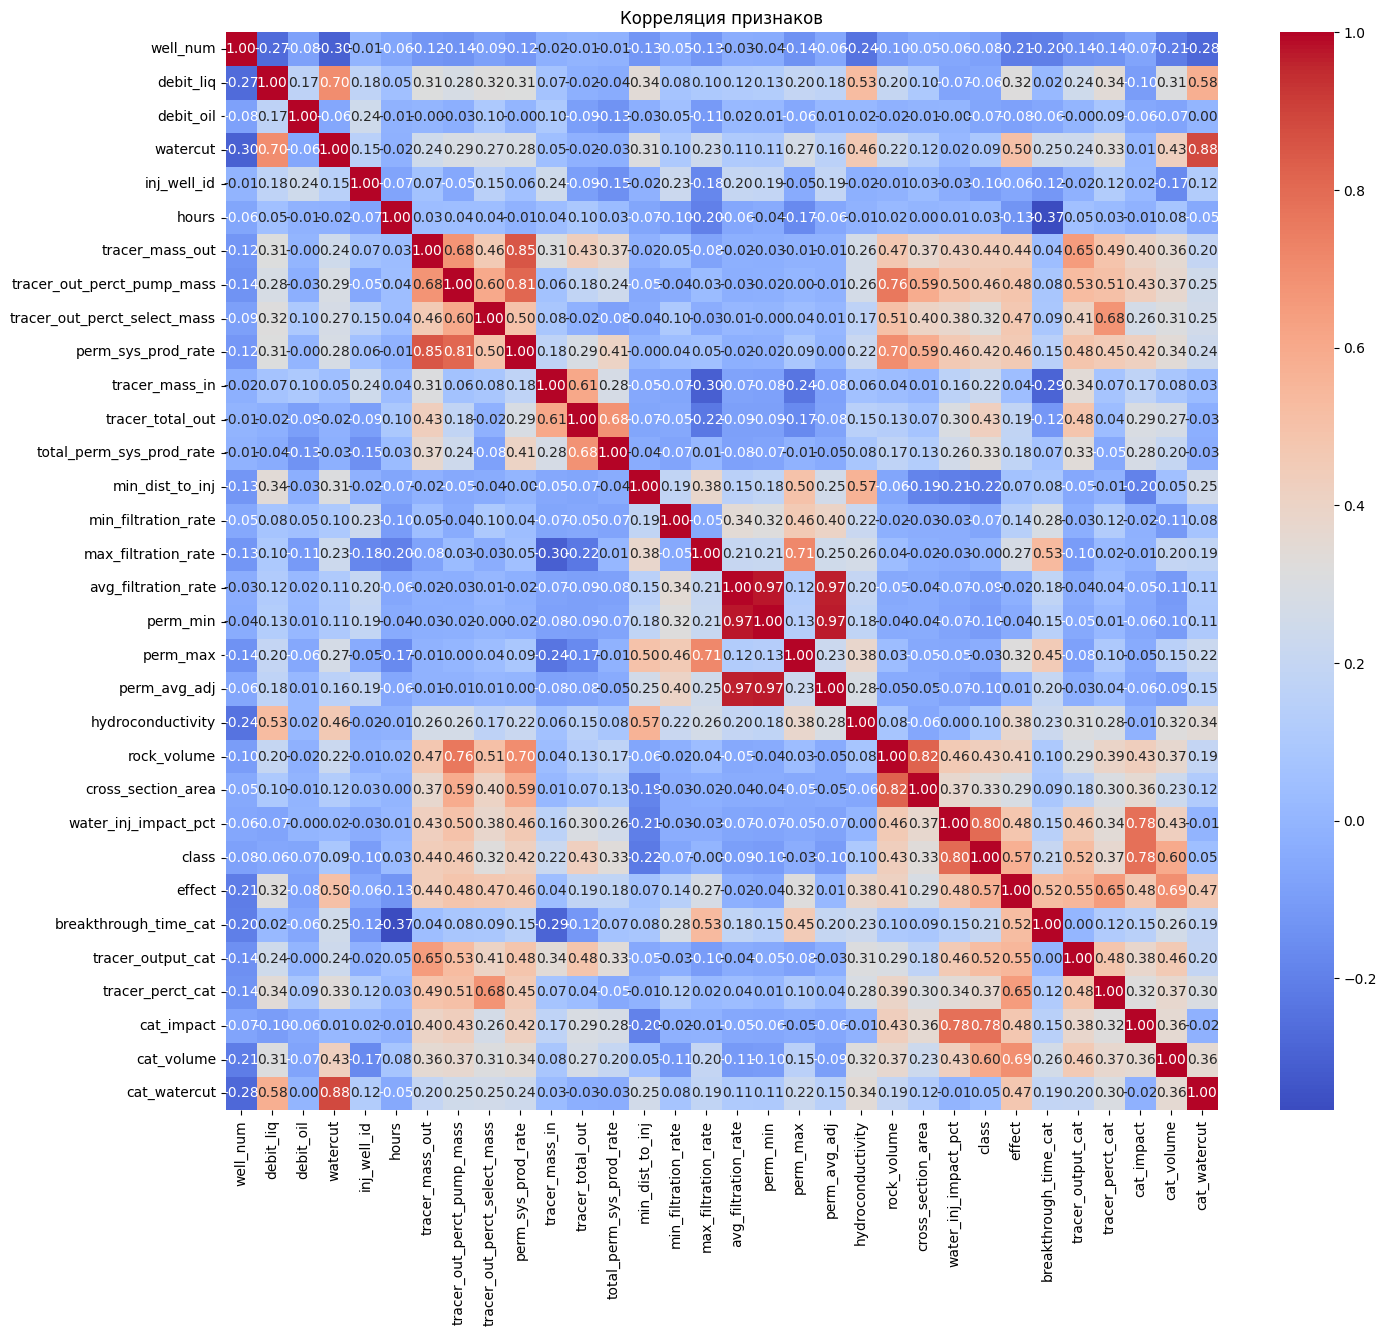

In [ ]:
df1 = df.drop(['effect_score', 'effect_calc'], axis = 1)
corr_matrix = df1.corr(numeric_only = True)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot = True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция признаков")

In [ ]:
# Посмотрим пары признаков с высокой корреляцией
high_corr_pairs = []
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) >= threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr))
for pair in high_corr_pairs:
    print(f"{pair[0]} ↔ {pair[1]}: corr = {pair[2]:.2f}")

watercut ↔ cat_watercut: corr = 0.88
tracer_mass_out ↔ perm_sys_prod_rate: corr = 0.85
tracer_out_perct_pump_mass ↔ perm_sys_prod_rate: corr = 0.81
avg_filtration_rate ↔ perm_min: corr = 0.97
avg_filtration_rate ↔ perm_avg_adj: corr = 0.97
perm_min ↔ perm_avg_adj: corr = 0.97
rock_volume ↔ cross_section_area: corr = 0.82


In [ ]:
cols_to_drop = [
    'perm_sys_prod_rate',
    'perm_min',
    'cross_section_area',
    'perm_avg_adj',
    'watercut',
    'water_inj_impact_pct'
]
df = df.drop(columns=cols_to_drop, errors='ignore')

Text(0.5, 1.0, 'Корреляция признаков')

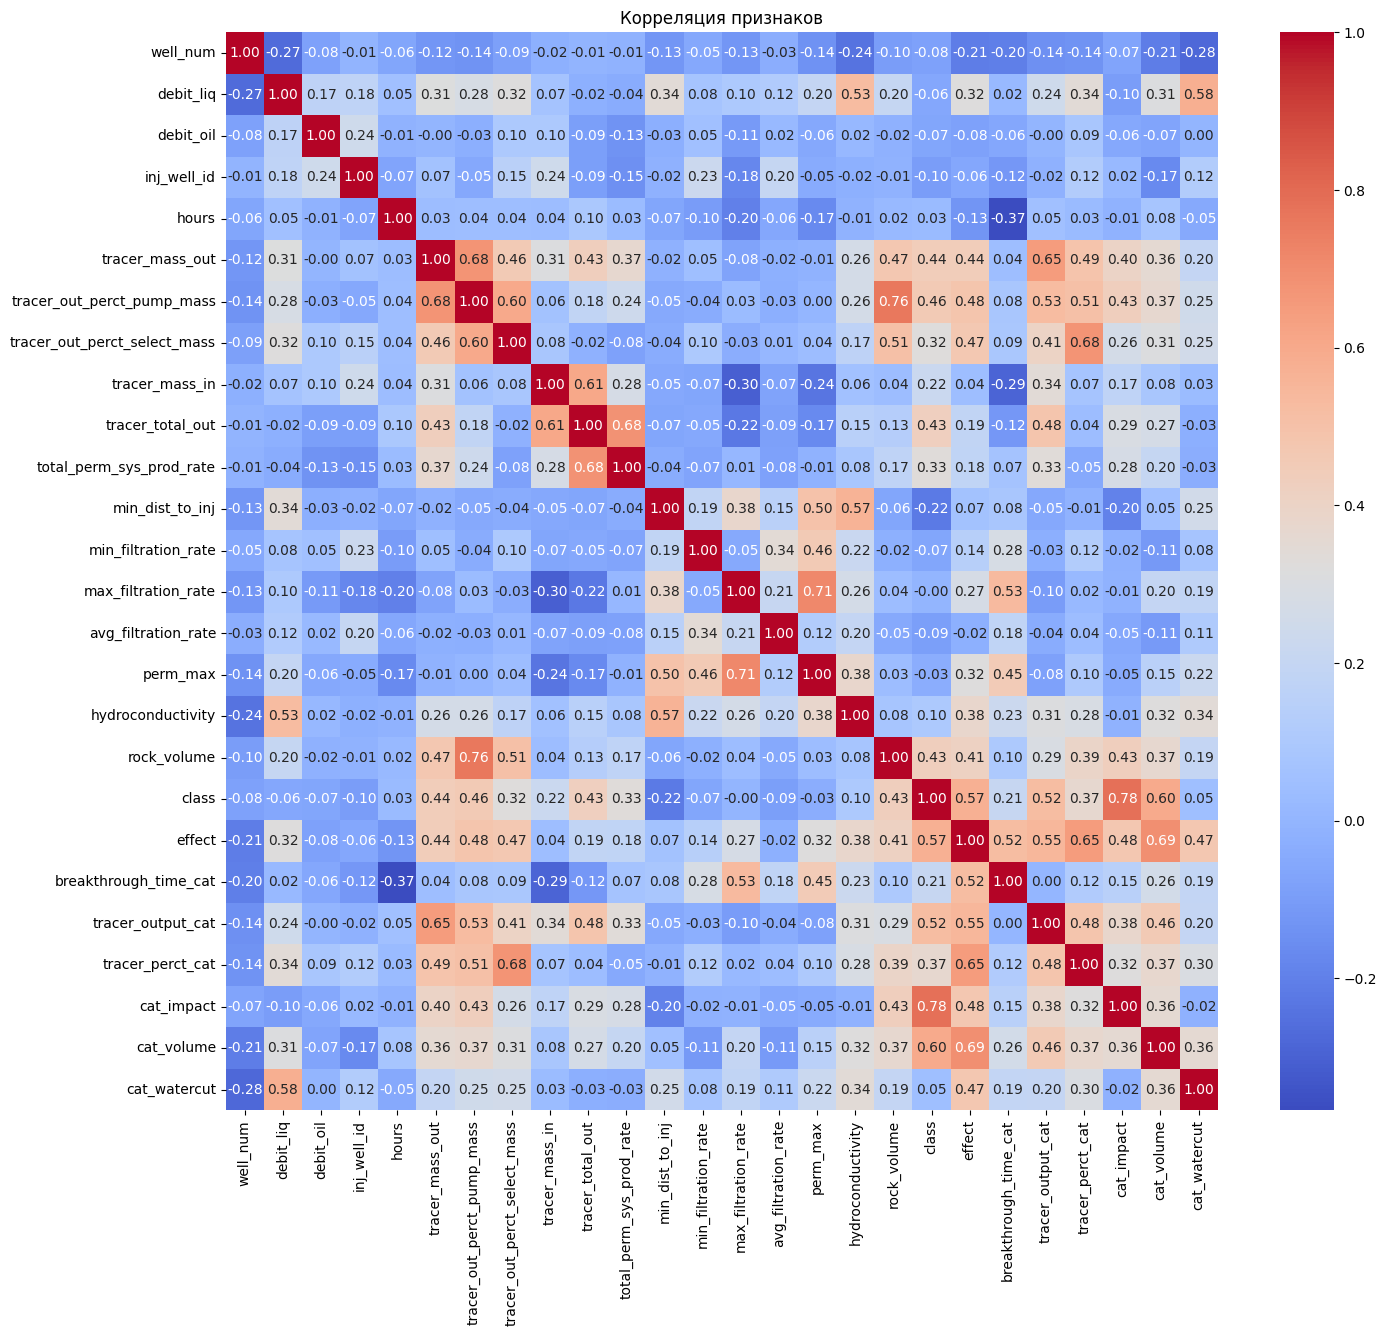

In [ ]:
# сильная корреляция между категориальной watercut и cat_watercut
df1 = df.drop(['effect_score', 'effect_calc'], axis = 1)
corr_matrix = df1.corr(numeric_only = True)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot = True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция признаков")

#**Построение модели**

In [ ]:
import shap
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 550
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   well_num                      550 non-null    int64  
 1   debit_liq                     550 non-null    float64
 2   debit_oil                     550 non-null    float64
 3   inj_well_id                   550 non-null    int64  
 4   hours                         550 non-null    float64
 5   tracer_mass_out               550 non-null    float64
 6   tracer_out_perct_pump_mass    550 non-null    float64
 7   tracer_out_perct_select_mass  550 non-null    float64
 8   tracer_mass_in                550 non-null    int64  
 9   tracer_total_out              550 non-null    float64
 10  total_perm_sys_prod_rate      550 non-null    float64
 11  min_dist_to_inj               550 non-null    float64
 12  min_filtration_rate           550 non-null    float64
 13  max_filtra

In [ ]:
# Разделение на признаки и цель
X = df.drop(['effect', 'effect_score', 'effect_calc', 'well_num', 'inj_well_id'], axis = 1)
y = df['effect']

In [ ]:
# Категориальные признаки
cat_features = ['breakthrough_time_cat', 'tracer_output_cat', 'tracer_perct_cat', 'cat_impact',
                 'cat_watercut', 'cat_volume', 'class']

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train, cat_features=cat_features)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.97      0.98      0.97        59
         0.0       0.97      0.91      0.94        34
         1.0       0.94      1.00      0.97        17

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110



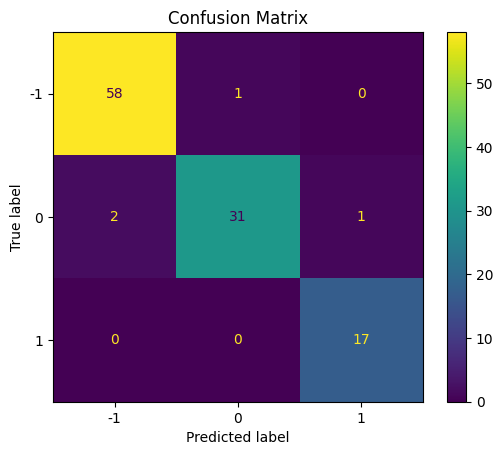

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=[-1, 0, 1])
plt.title("Confusion Matrix")
plt.show()

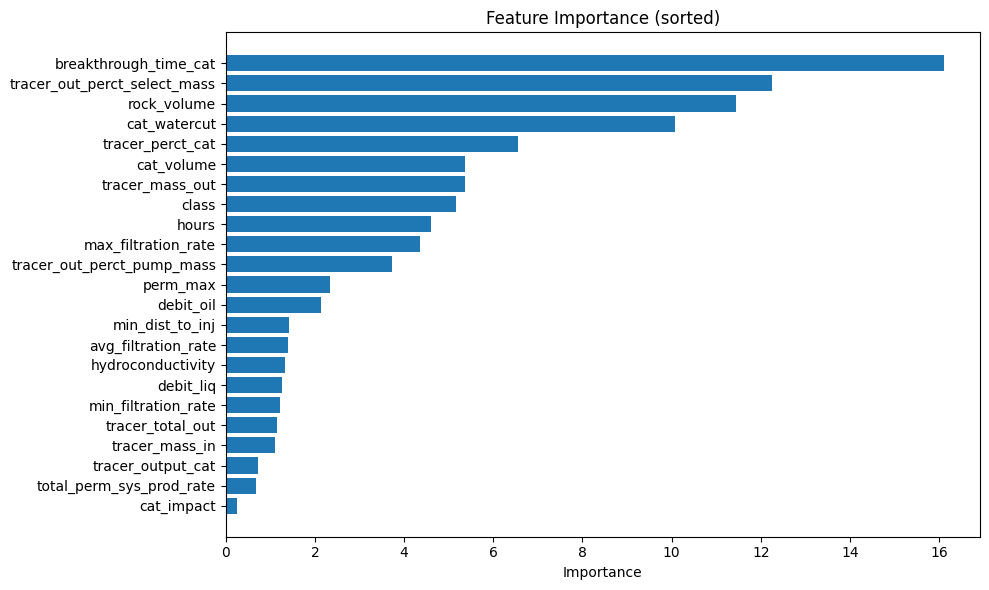

In [ ]:
# Получаем важности и названия признаков
importances = model.get_feature_importance()
feature_names = X.columns

# Сортировка по убыванию
sorted_idx = np.argsort(importances)

# Построение отсортированной диаграммы
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (sorted)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Проверим, что не сошлось и постараемся исправить при дальнейшеи исправлении логики

In [ ]:
df['predicted_effect'] = model.predict(X)

In [ ]:
cols_to_show = ['inj_well_id', 'well_num', 'effect', 'predicted_effect']
df_compare = df[cols_to_show]

In [ ]:
df_errors = df_compare[df_compare['effect'] != df_compare['predicted_effect']]

In [ ]:
df_errors

,inj_well_id,well_num,effect,predicted_effect
101,306,390,0.0,-1.0
102,306,391,0.0,-1.0
195,362,1389,-1.0,0.0
371,532,472,0.0,1.0


Для более точного определения логики посмотрим влияение логики через SHAP

In [ ]:
# Объяснитель для CatBoost
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

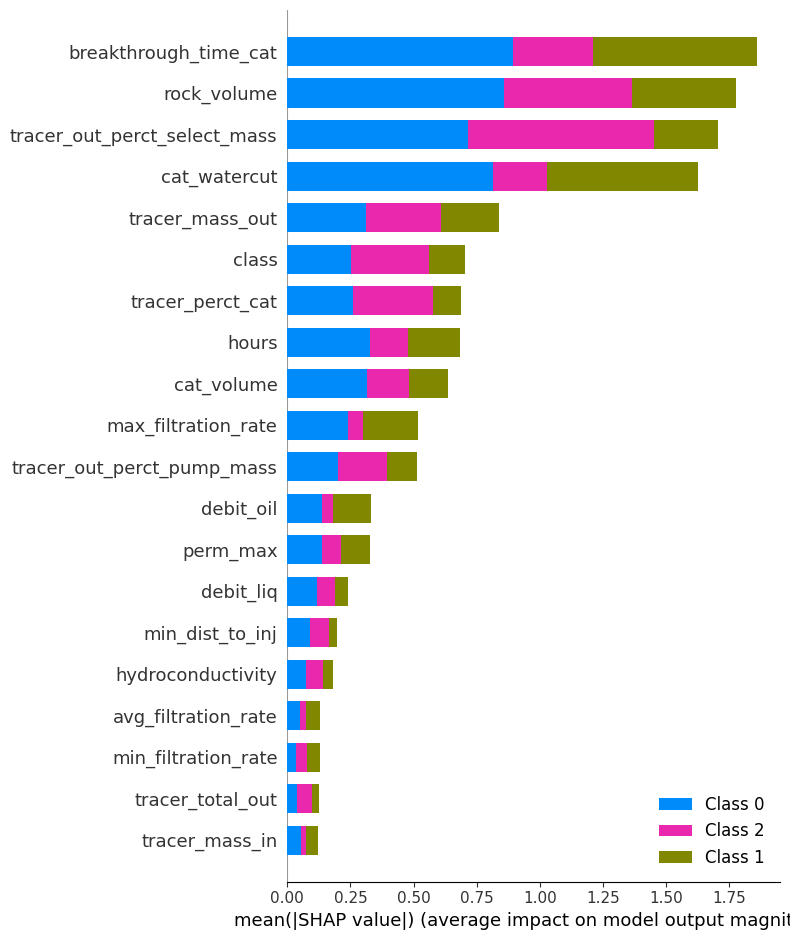

In [ ]:
# Глобальный summary plot
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
model.classes_

array([-1.,  0.,  1.])

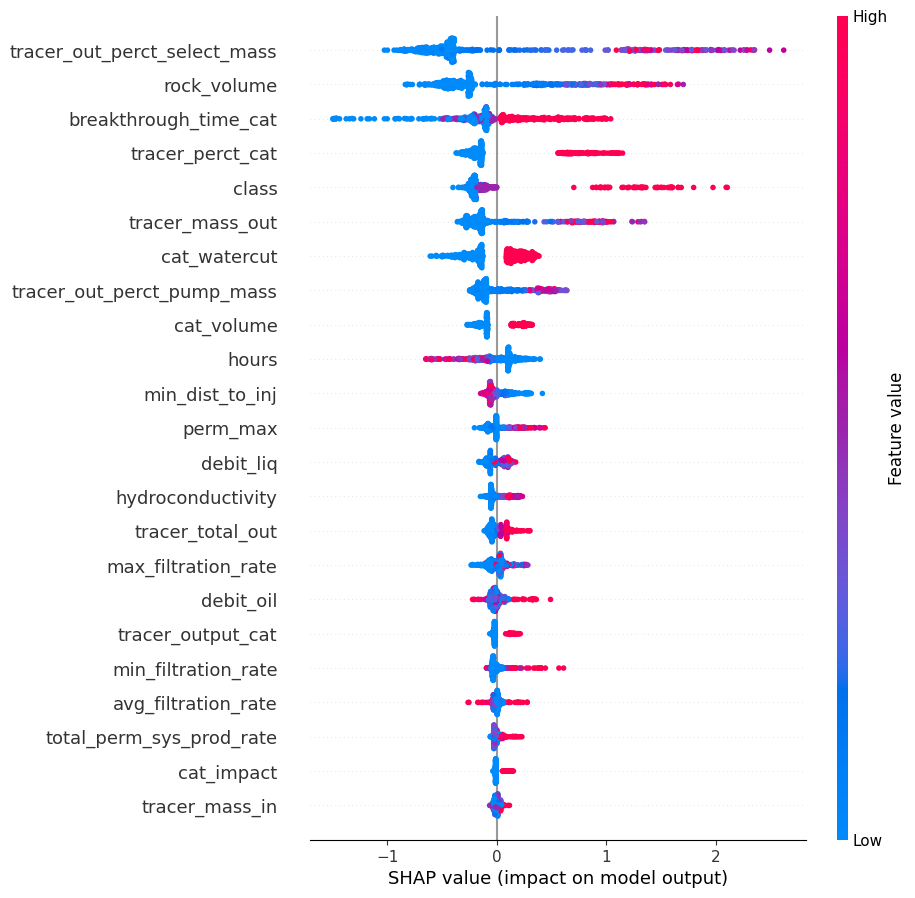

In [ ]:
# 1. Создаем объяснитель
explainer = shap.TreeExplainer(model)
# 2. Получаем SHAP значения как Explanation объект
shap_values = explainer(X)
# 3. Beeswarm для всех классов
shap.plots.beeswarm(shap_values[..., 2], max_display = 24)  # Класс 1 (эффективный)

In [ ]:
# Функция-помощник для очистки данных под конкретную модель
def prepare_for_model(model_obj, source_df, cat_list):
    cols = model_obj.feature_names_
    df_res = source_df[cols].copy()
    for c in cat_list:
        if c in df_res.columns:
            # Превращаем в строку, чтобы CatBoost не ругался на float
            df_res[c] = df_res[c].astype(float).astype(int).astype(str)
    return df_res

In [ ]:
# Данные для Модели 1
X_for_m1 = prepare_for_model(model, X_test.head(100), cat_features)

In [ ]:
explainer1 = shap.TreeExplainer(model)

In [ ]:
y_demo_first = y_test.head(100)

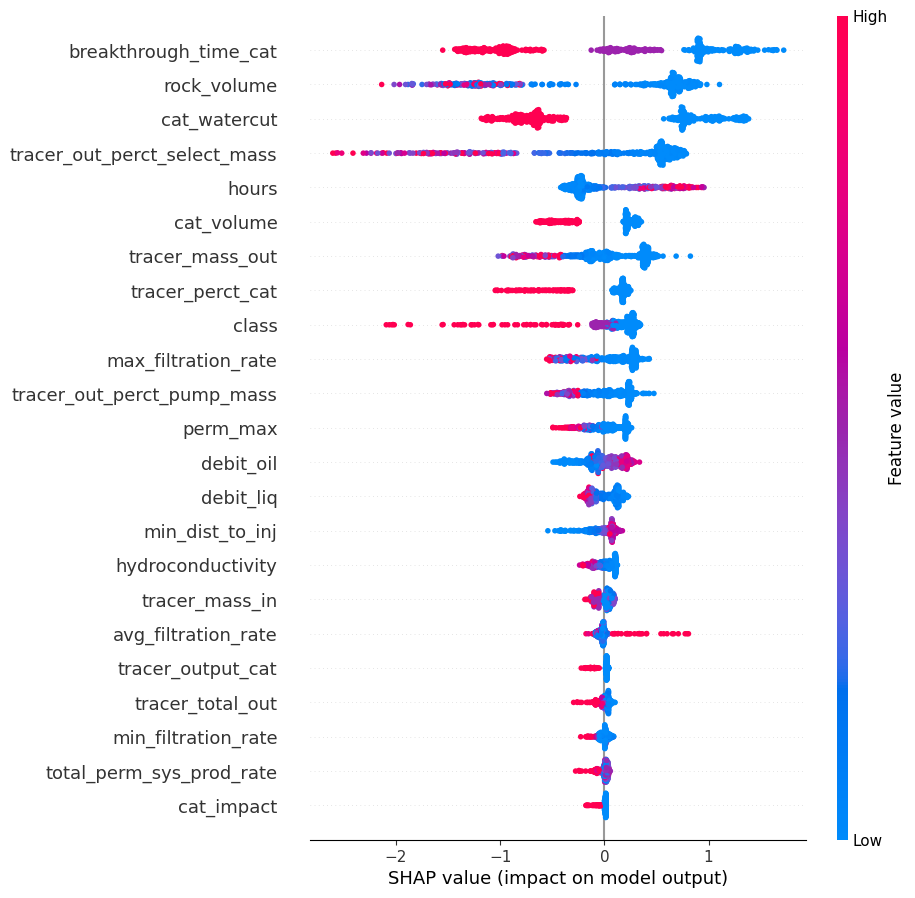

In [ ]:
# 1. Создаем объяснитель
explainer = shap.TreeExplainer(model)
# 2. Получаем SHAP значения как Explanation объект
shap_values = explainer(X)
# 3. Beeswarm для всех классов
shap.plots.beeswarm(shap_values[..., 0], max_display = 24)  # Класс -1 (неэффективный)

In [ ]:
def get_shap_weights(shap_values_class, feature_names):
    weights = {}

    for i, name in enumerate(feature_names):
        shap_vals = shap_values_class[:, i]

        # Метрики:
        mean_abs = np.mean(np.abs(shap_vals))
        median = np.median(shap_vals)
        std = np.std(shap_vals)
        pos_frac = np.mean(shap_vals > 0)

        # Уверенность: положительное, направленное и нерасплывчатое
        confidence = (np.abs(median) / (std + 1e-5)) * pos_frac

        # Общий вес = importance * confidence
        weight = mean_abs * confidence

        weights[name] = weight

    # Нормализация (необязательно)
    max_weight = max(weights.values())
    weights_norm = {k: round(v / max_weight, 2) for k, v in weights.items()}

    return pd.Series(weights_norm).sort_values(ascending=False)

In [ ]:
# Получим SHAP values для класса 1
shap_class1 = shap_values[..., 2].values  # shape: (n_samples, n_features)

# Получим веса
shap_weights = get_shap_weights(shap_class1, X.columns)

print(shap_weights)

tracer_out_perct_select_mass    1.00
rock_volume                     0.78
cat_watercut                    0.56
cat_volume                      0.33
tracer_mass_out                 0.31
tracer_perct_cat                0.28
tracer_out_perct_pump_mass      0.28
breakthrough_time_cat           0.27
hours                           0.22
class                           0.15
min_dist_to_inj                 0.12
hydroconductivity               0.12
tracer_total_out                0.09
debit_liq                       0.06
min_filtration_rate             0.04
max_filtration_rate             0.04
debit_oil                       0.03
tracer_output_cat               0.03
total_perm_sys_prod_rate        0.03
perm_max                        0.03
tracer_mass_in                  0.01
cat_impact                      0.01
avg_filtration_rate             0.00
dtype: float64


In [ ]:
# Получим SHAP values для класса 1
shap_class0 = shap_values[..., 0].values  # shape: (n_samples, n_features)

# Получим веса
shap_weights = get_shap_weights(shap_class0, X.columns)

print(shap_weights)

rock_volume                     1.00
tracer_out_perct_select_mass    0.83
cat_watercut                    0.61
cat_volume                      0.35
breakthrough_time_cat           0.32
tracer_perct_cat                0.31
class                           0.19
hours                           0.17
max_filtration_rate             0.12
tracer_out_perct_pump_mass      0.06
min_dist_to_inj                 0.05
tracer_output_cat               0.03
perm_max                        0.03
tracer_mass_in                  0.03
total_perm_sys_prod_rate        0.02
hydroconductivity               0.02
tracer_total_out                0.01
cat_impact                      0.01
min_filtration_rate             0.01
tracer_mass_out                 0.00
debit_oil                       0.00
debit_liq                       0.00
avg_filtration_rate             0.00
dtype: float64


**С помощью весов настроим логику выбора объектов**

In [ ]:
date = df_main.copy()

In [ ]:
date = date.drop(['min_filtration_rate','debit_oil', 'tracer_output_cat', 'total_perm_sys_prod_rate', 'total_perm_sys_prod_rate', 'perm_max', 'debit_liq', 'debit_oil', 'tracer_mass_in', 'cat_impact', 'avg_filtration_rate'], axis = 1)

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 550
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   well_num                      550 non-null    int64  
 1   watercut                      550 non-null    int64  
 2   inj_well_id                   550 non-null    int64  
 3   hours                         550 non-null    float64
 4   tracer_mass_out               550 non-null    float64
 5   tracer_out_perct_pump_mass    550 non-null    float64
 6   tracer_out_perct_select_mass  550 non-null    float64
 7   perm_sys_prod_rate            550 non-null    float64
 8   tracer_total_out              550 non-null    float64
 9   min_dist_to_inj               550 non-null    float64
 10  max_filtration_rate           550 non-null    float64
 11  perm_min                      550 non-null    float64
 12  perm_avg_adj                  550 non-null    float64
 13  hydrocondu

In [ ]:
# Расчёт итогового балла с весами
date['effect_score_weighted'] = (
    date['breakthrough_time_cat'] * 0.3 +
    date['class'] * 0.19 +
    date['cat_watercut'] * 0.6 +
    date['tracer_perct_cat'] * 0.3 +
    date['cat_volume'] * 0.33
)

In [ ]:
date['effect_score_weighted'].describe()

,effect_score_weighted
count,550.000000
mean,0.618164
std,0.635668
min,-0.300000
25%,0.190000
50%,0.600000
75%,1.120000
max,2.100000


In [ ]:
date['effect_score_weighted'].value_counts()

,count
effect_score_weighted,
-0.30,99
0.30,95
0.90,48
1.12,30
0.60,24
1.23,23
0.00,22
0.82,22
1.42,21


In [ ]:
date['effect_score_weighted'].quantile(0.75)

np.float64(1.12)

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 550
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   well_num                      550 non-null    int64  
 1   watercut                      550 non-null    int64  
 2   inj_well_id                   550 non-null    int64  
 3   hours                         550 non-null    float64
 4   tracer_mass_out               550 non-null    float64
 5   tracer_out_perct_pump_mass    550 non-null    float64
 6   tracer_out_perct_select_mass  550 non-null    float64
 7   perm_sys_prod_rate            550 non-null    float64
 8   tracer_total_out              550 non-null    float64
 9   min_dist_to_inj               550 non-null    float64
 10  max_filtration_rate           550 non-null    float64
 11  perm_min                      550 non-null    float64
 12  perm_avg_adj                  550 non-null    float64
 13  hydrocondu

In [ ]:
q25 = date['effect_score_weighted'].quantile(0.25)
q75 = date['effect_score_weighted'].quantile(0.75)

In [ ]:
q25, q75

(np.float64(0.19), np.float64(1.12))

In [ ]:
def map_effect_weighted(score):
    if score > 1.09:       # уверенный высокий балл
        return 1
    elif score < 0.9:  # уверенно неэффективный
        return -1
    else:
        return 0       # спорная зона

date['effect_calc_weighted'] = date['effect_score_weighted'].apply(map_effect_weighted)

In [ ]:
date[(df_main['effect'].notna()) & (date['effect'] == -1)][['tracer_perct_cat','cat_volume','cat_watercut','class','breakthrough_time_cat','effect_score_weighted','effect', 'effect_calc_weighted']].max()

,0
tracer_perct_cat,1.00
cat_volume,0.00
cat_watercut,1.00
class,1.00
breakthrough_time_cat,1.00
effect_score_weighted,1.09
effect,-1.00
effect_calc_weighted,0.00


In [ ]:
date[(df_main['effect'].notna()) & (date['effect'] == 1)][['tracer_perct_cat','cat_volume','cat_watercut','class','breakthrough_time_cat','effect_score_weighted','effect', 'effect_calc_weighted']].min()

,0
tracer_perct_cat,0.0
cat_volume,0.0
cat_watercut,0.0
class,0.0
breakthrough_time_cat,-1.0
effect_score_weighted,0.9
effect,1.0
effect_calc_weighted,-1.0


In [ ]:
date['effect'] = date['effect'].fillna(date['effect_calc_weighted'])

In [ ]:
date['effect'].value_counts()

,count
effect,
-1.0,364
1.0,151
0.0,35


Text(0.5, 1.0, 'Корреляция признаков')

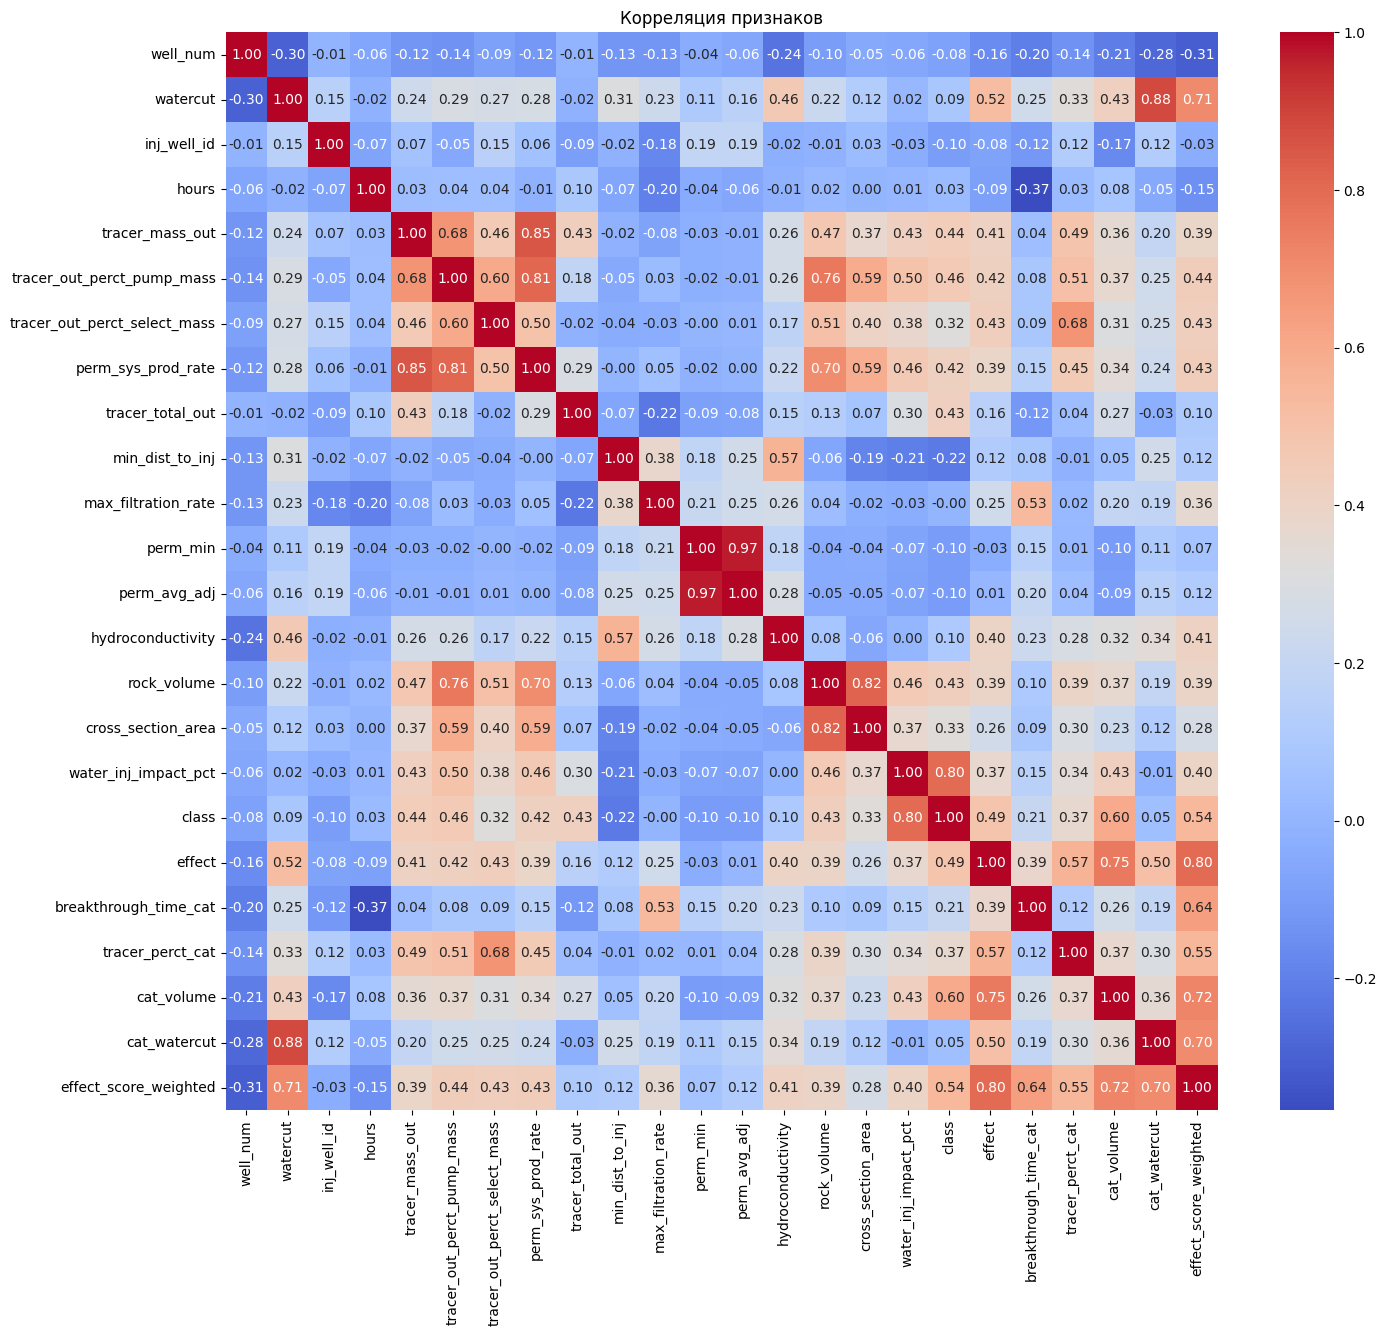

In [ ]:
df2 = date.drop(['effect_score', 'effect_calc', 'effect_calc_weighted'], axis = 1)
corr_matrix = df2.corr(numeric_only = True)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot = True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция признаков")

In [ ]:
# Посмотрим пары признаков с высокой корреляцией
high_corr_pairs = []
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) >= threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr))
for pair in high_corr_pairs:
    print(f"{pair[0]} ↔ {pair[1]}: corr = {pair[2]:.2f}")

watercut ↔ cat_watercut: corr = 0.88
tracer_mass_out ↔ perm_sys_prod_rate: corr = 0.85
tracer_out_perct_pump_mass ↔ perm_sys_prod_rate: corr = 0.81
perm_min ↔ perm_avg_adj: corr = 0.97
rock_volume ↔ cross_section_area: corr = 0.82


In [ ]:
cols_to_drop = [
    'perm_sys_prod_rate',
    'perm_min',
    'cross_section_area',
    'perm_avg_adj',
    'watercut',
    'effect_score_weighted',
    'water_inj_impact_pct'
]
date = date.drop(columns=cols_to_drop, errors='ignore')

Text(0.5, 1.0, 'Корреляция признаков')

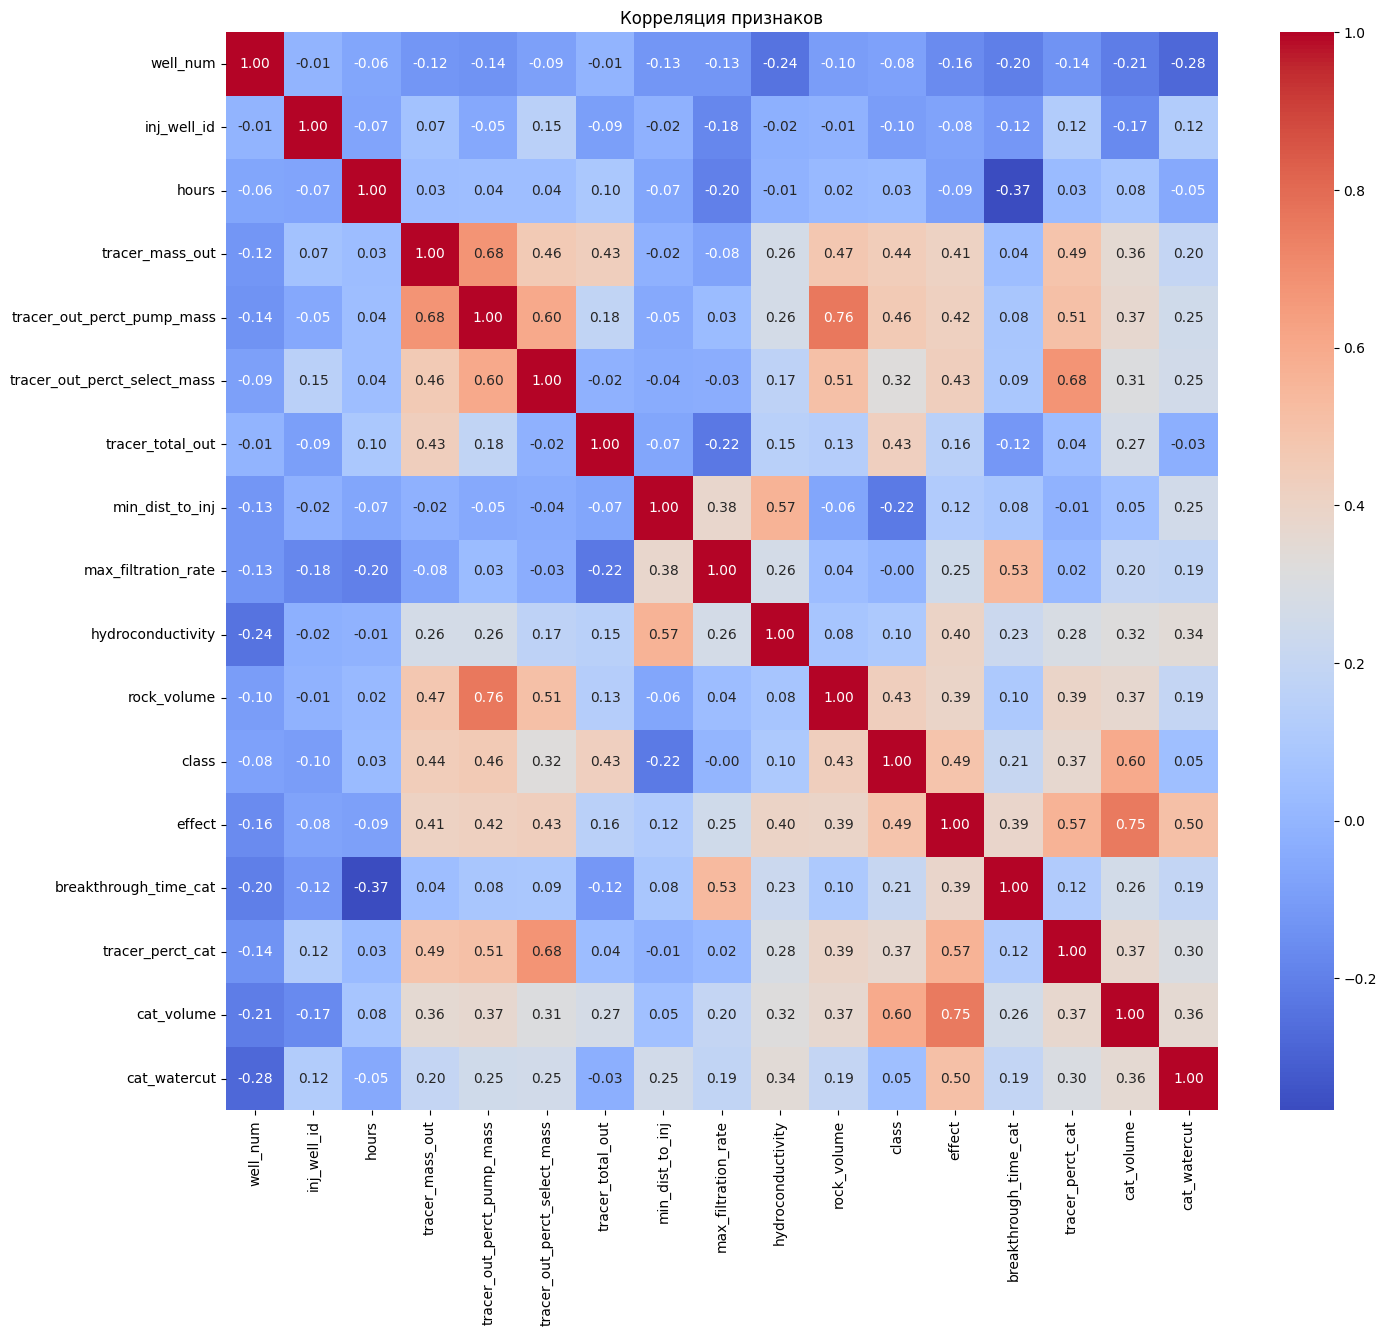

In [ ]:
# сильная корреляция между категориальной watercut и cat_watercut
df2 = date.drop(['effect_score', 'effect_calc', 'effect_calc_weighted'], axis = 1)
corr_matrix = df2.corr(numeric_only = True)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot = True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция признаков")

In [ ]:
date.columns

Index(['well_num', 'inj_well_id', 'hours', 'tracer_mass_out',
       'tracer_out_perct_pump_mass', 'tracer_out_perct_select_mass',
       'tracer_total_out', 'min_dist_to_inj', 'max_filtration_rate',
       'hydroconductivity', 'rock_volume', 'class', 'effect',
       'breakthrough_time_cat', 'tracer_perct_cat', 'cat_volume',
       'cat_watercut', 'effect_score', 'effect_calc', 'effect_calc_weighted'],
      dtype='object')

In [ ]:
date = date.drop('rock_volume_cat_weighted', axis = 1, errors = 'ignore')

In [ ]:
# Разделение на признаки и цель
X = date.drop(['well_num', 'inj_well_id', 'effect', 'effect_score', 'effect_calc', 'effect_calc_weighted'], axis = 1)
y = date['effect']

In [ ]:
X.columns

Index(['hours', 'tracer_mass_out', 'tracer_out_perct_pump_mass',
       'tracer_out_perct_select_mass', 'tracer_total_out', 'min_dist_to_inj',
       'max_filtration_rate', 'hydroconductivity', 'rock_volume', 'class',
       'breakthrough_time_cat', 'tracer_perct_cat', 'cat_volume',
       'cat_watercut'],
      dtype='object')

In [ ]:
# Категориальные признаки
cat_features = ['breakthrough_time_cat', 'tracer_perct_cat','cat_watercut', 'cat_volume', 'class']

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train, cat_features=cat_features)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.97      0.97      0.97        73
         0.0       0.75      0.43      0.55         7
         1.0       0.91      1.00      0.95        30

    accuracy                           0.95       110
   macro avg       0.88      0.80      0.82       110
weighted avg       0.94      0.95      0.94       110



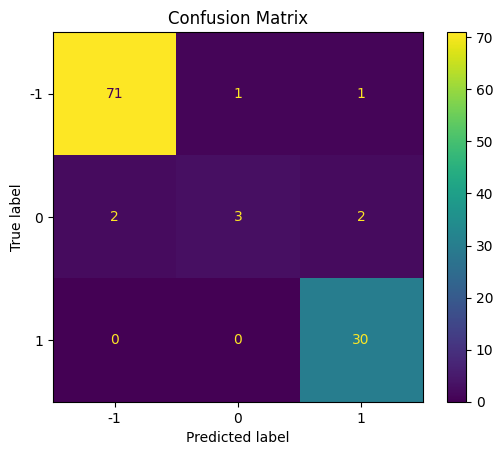

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=[-1, 0, 1])
plt.title("Confusion Matrix")
plt.show()

#**Финальная модель**

In [ ]:
# обучающая выборка только -1 и 1
df_binary_train = date[date['effect'].isin([-1, 1])]
df_binary_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 0 to 550
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   well_num                      515 non-null    int64  
 1   inj_well_id                   515 non-null    int64  
 2   hours                         515 non-null    float64
 3   tracer_mass_out               515 non-null    float64
 4   tracer_out_perct_pump_mass    515 non-null    float64
 5   tracer_out_perct_select_mass  515 non-null    float64
 6   tracer_total_out              515 non-null    float64
 7   min_dist_to_inj               515 non-null    float64
 8   max_filtration_rate           515 non-null    float64
 9   hydroconductivity             515 non-null    int64  
 10  rock_volume                   515 non-null    float64
 11  class                         515 non-null    int64  
 12  effect                        515 non-null    float64
 13  breakthrou

In [ ]:
df_binary_train['effect'].value_counts()

,count
effect,
-1.0,364
1.0,151


In [ ]:
df_bin_train, df_bin_val = train_test_split(df_binary_train, test_size=0.2, stratify=df_binary_train['effect'], random_state=42)

In [ ]:
# После сплита
X_bin_train = df_bin_train.drop(['well_num', 'inj_well_id', 'effect', 'effect_score', 'effect_calc', 'effect_calc_weighted'], axis=1)
y_bin_train = df_bin_train['effect']

In [ ]:
X_bin_val = df_bin_val.drop(['well_num', 'inj_well_id', 'effect', 'effect_score', 'effect_calc', 'effect_calc_weighted'], axis=1)
y_bin_val = df_bin_val['effect']

In [ ]:
cat_features_bin = ['breakthrough_time_cat', 'tracer_perct_cat','cat_watercut', 'cat_volume', 'class']

In [ ]:
model_bin = CatBoostClassifier(verbose=0, random_state=42)
model_bin.fit(X_bin_train, y_bin_train, cat_features=cat_features_bin)

In [ ]:
y_val_pred = model_bin.predict(X_bin_val)
print(classification_report(y_bin_val, y_val_pred))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99        73
         1.0       1.00      0.97      0.98        30

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103



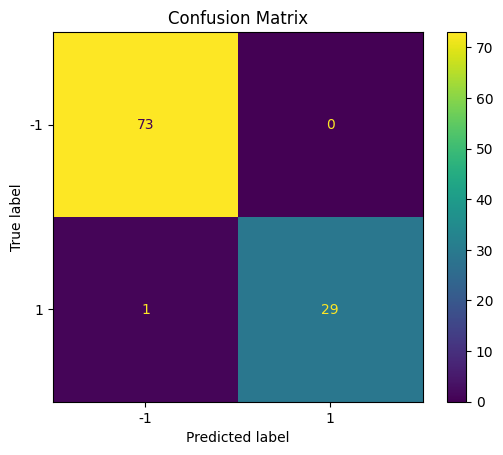

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_bin, X_bin_val, y_bin_val, display_labels=[-1,1])
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df_test_unknown = date[date['effect'] == 0].copy()
X_bin_test = df_test_unknown.drop(['well_num', 'inj_well_id', 'effect', 'effect_score', 'effect_calc', 'effect_calc_weighted'], axis=1)

In [ ]:
df_test_unknown['effect'].value_counts()

,count
effect,
0.0,35


In [ ]:
y_bin_test_pred = model_bin.predict(X_bin_test)

In [ ]:
df_test_unknown['effect_pred'] = y_bin_test_pred

In [ ]:
df_test_unknown['effect_pred_proba'] = model_bin.predict_proba(X_bin_test)[:, 1]

In [ ]:
df_test_unknown[['well_num','inj_well_id','effect_pred', 'effect_pred_proba']]

,well_num,inj_well_id,effect_pred,effect_pred_proba
12,304,361,1.0,0.936259
17,360,361,-1.0,0.019019
18,387,361,1.0,0.919575
20,391,361,-1.0,0.057755
24,1251,361,-1.0,0.066365
25,1279,361,-1.0,0.053675
26,1307,361,-1.0,0.206733
63,445,333,1.0,0.946764
120,4363,306,-1.0,0.009444
166,58,362,-1.0,0.431739


In [ ]:
df_test_unknown['confidence'] = df_test_unknown['effect_pred_proba'].apply(lambda p: max(p, 1 - p))

In [ ]:
df_test_unknown['confidence_label'] = df_test_unknown.apply(
    lambda row: (
        'уверенно эффективная' if row['confidence'] > 0.85 and row['effect_pred'] == 1
        else 'уверенно неэффективная' if row['confidence'] > 0.85 and row['effect_pred'] == -1
        else 'неуверенная'
    ),
    axis=1
)

In [ ]:
df_test_unknown[['well_num','inj_well_id','effect_pred', 'effect_pred_proba', 'confidence_label']]

,well_num,inj_well_id,effect_pred,effect_pred_proba,confidence_label
12,304,361,1.0,0.936259,уверенно эффективная
17,360,361,-1.0,0.019019,уверенно неэффективная
18,387,361,1.0,0.919575,уверенно эффективная
20,391,361,-1.0,0.057755,уверенно неэффективная
24,1251,361,-1.0,0.066365,уверенно неэффективная
25,1279,361,-1.0,0.053675,уверенно неэффективная
26,1307,361,-1.0,0.206733,неуверенная
63,445,333,1.0,0.946764,уверенно эффективная
120,4363,306,-1.0,0.009444,уверенно неэффективная
166,58,362,-1.0,0.431739,неуверенная


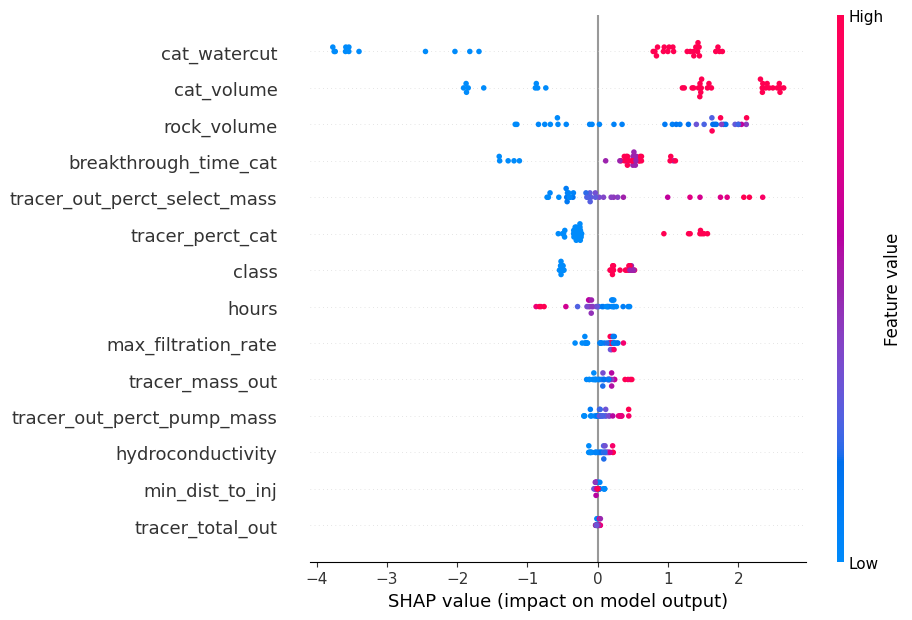

In [ ]:
# Обязательно: shap_values_bin должен быть рассчитан на X_bin_train или X_bin_test
explainer_bin = shap.TreeExplainer(model_bin)
shap_values_bin = explainer_bin(X_bin_test)

# Теперь beeswarm по классу 1
shap.plots.beeswarm(shap_values_bin, max_display=20)

In [ ]:
explainer2 = shap.TreeExplainer(model_bin)

In [ ]:
X_for_m2 = prepare_for_model(model_bin, X_bin_test.head(50), cat_features_bin)

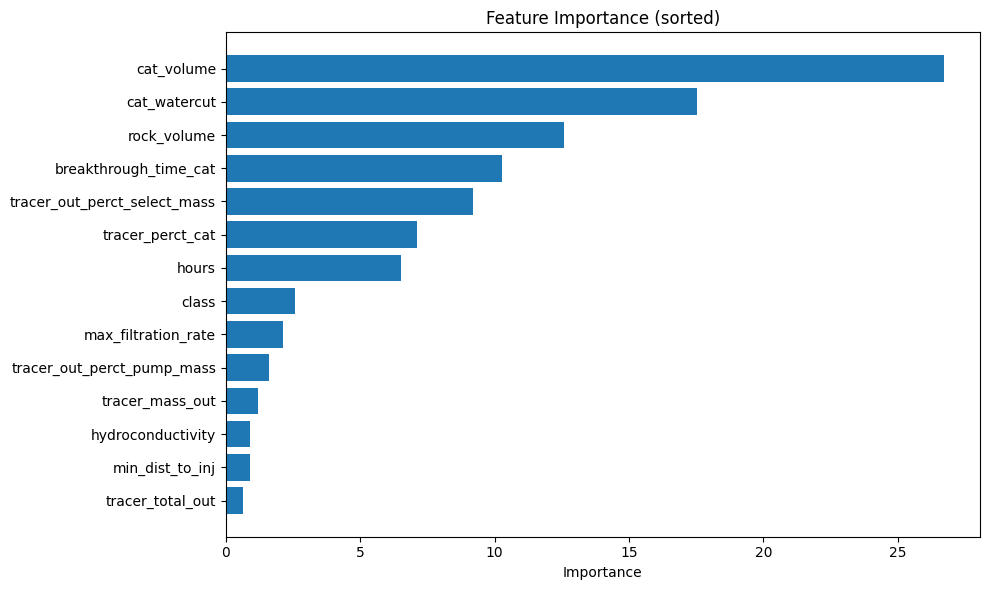

In [ ]:
# Получаем важности и названия признаков
importances = model_bin.get_feature_importance()
feature_names = X_bin_train.columns

# Сортировка по убыванию
sorted_idx = np.argsort(importances)

# Построение отсортированной диаграммы
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (sorted)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Только уверенные эффективные кандидаты
candidates = df_test_unknown[df_test_unknown['confidence_label'] == 'уверенно эффективная']
candidates_sorted = candidates.sort_values(by='effect_pred_proba', ascending=False)

# Вывод
candidates_sorted[['well_num', 'inj_well_id', 'effect_pred_proba', 'confidence']]

,well_num,inj_well_id,effect_pred_proba,confidence
263,360,280,0.997374,0.997374
191,1333,362,0.994804,0.994804
463,506,1600,0.984667,0.984667
207,58,389,0.984274,0.984274
63,445,333,0.946764,0.946764
180,359,362,0.945732,0.945732
212,252,389,0.940136,0.940136
176,304,362,0.939023,0.939023
12,304,361,0.936259,0.936259
182,387,362,0.934144,0.934144


In [ ]:
import joblib
import json
import os
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model, 'models/first_model_3class.pkl') # Первая (3 класса)
joblib.dump(model_bin, 'models/second_model_binary.pkl') # Вторая (бинарная)

joblib.dump({'explainer': explainer1}, 'models/shap_explainer_3class.pkl')
joblib.dump({'explainer': explainer2}, 'models/shap_explainer_binary.pkl')

['models/shap_explainer_binary.pkl']

In [ ]:
demo_bundle = {
    'm1_data': X_for_m1,
    'm1_labels': y_demo_first.values.flatten(),
    'm2_data': X_for_m2,
    'candidates': df_test_unknown.to_dict(orient='records')
}
joblib.dump(demo_bundle, 'models/demo_bundle.pkl')

print("✅ Все файлы разделены и сохранены!")

✅ Все файлы разделены и сохранены!


In [ ]:
from sklearn.metrics import classification_report

report1 = classification_report(y_test, y_pred, output_dict=True)
report2 = classification_report(y_bin_val, y_val_pred, output_dict=True)

metrics = {
    'model_3class': report1,
    'model_binary': report2
}

with open('models/metrics.json', 'w') as f:
    json.dump(metrics, f)